In [ ]:
from src.models import *

Ns = (11, 11, 11)
N_vec = Ns[0]*Ns[1]*Ns[2]
Ls = (1, 1, 1)
beta = 0.5
max_iter = 300
eval_iter = 1
mu = 100
objectives = np.zeros([6, max_iter//eval_iter])

ham = deterministicHamiltonian(Ns, Ls,beta)
H = np.zeros([N_vec, N_vec])
eye = np.eye(N_vec)
# H = jnp.array(H)
lr = 1e-1
iter = 1
iter_eval = 0
while iter <= max_iter:

    gradient = ham.gradient(H)
    # effective_lr = lr/(lr + beta * np.sqrt(iter))
    effective_lr = lr
    H = (1-effective_lr)*H + effective_lr*(gradient - mu*eye)
    if iter % eval_iter == 0:
        objectives[:, iter_eval] = np.array(ham.objective(H))
        print(f"Iteration {iter}, Objective {objectives[:, iter_eval]}")
    iter += 1



/tmp/ipykernel_568633/1092114176.py:26: ComplexWarning: Casting complex values to real discards the imaginary part
  objectives[:, iter_eval] = np.array(ham.objective(H))


Iteration 1, Objective [ 1.73280584e+03  1.73280584e+03  1.73035645e+03  7.68322930e+01
  1.30457872e-28 -7.43829125e+01]
Iteration 2, Objective [ 1.26448236e+03  1.26448236e+03  1.23129289e+03  6.90886674e+01
  1.26612175e-28 -3.58991971e+01]
Iteration 3, Objective [ 1.17541920e+03  1.17541920e+03  1.12919120e+03  6.77052161e+01
  1.37459013e-28 -2.14772189e+01]
Iteration 4, Objective [ 1.15307050e+03  1.15307050e+03  1.10050683e+03  6.74503481e+01
  1.15173692e-28 -1.48866742e+01]
Iteration 5, Objective [ 1.14626450e+03  1.14626450e+03  1.09010910e+03  6.74240552e+01
  1.28978758e-28 -1.12686606e+01]
Iteration 6, Objective [ 1.14356506e+03  1.14356506e+03  1.08510185e+03  6.74334020e+01
  1.53137623e-28 -8.97019122e+00]
Iteration 7, Objective [ 1.14208749e+03  1.14208749e+03  1.08201520e+03  6.74393374e+01
  1.32331417e-28 -7.36704541e+00]
Iteration 8, Objective [ 1.14104679e+03  1.14104679e+03  1.07979491e+03  6.74374653e+01
  1.11821033e-28 -6.18558308e+00]
Iteration 9, Objective [

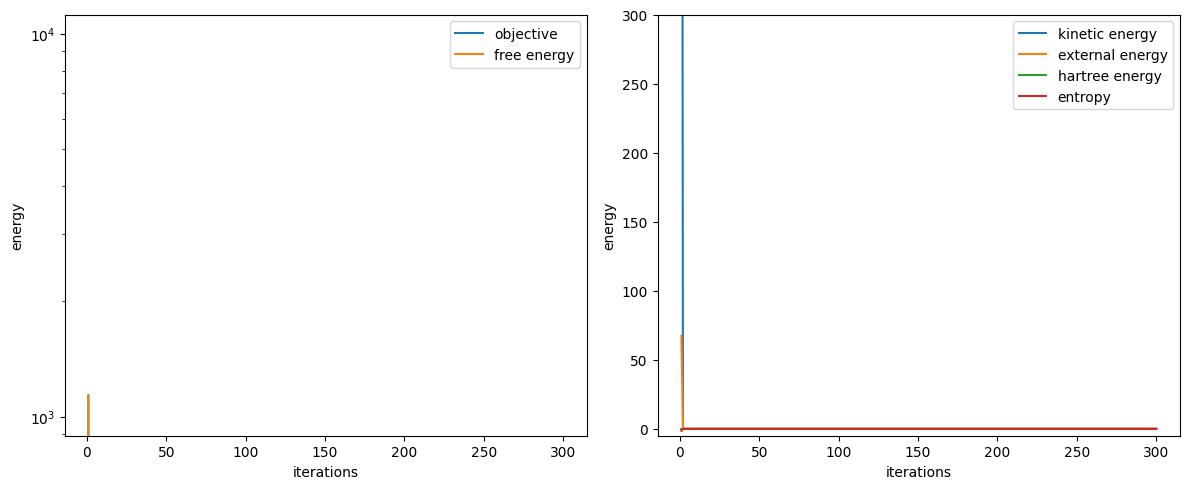

In [26]:
plt.figure(figsize=(12,5),dpi=100)
plt.subplot(1,2,1)
iters = np.linspace(1, max_iter, max_iter)
plt.semilogy(iters, objectives[0,:], label="objective")
plt.plot(iters, objectives[1,:], label='free energy')
plt.xlabel("iterations")
plt.ylabel("energy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(iters, objectives[2,:], label="kinetic energy")
plt.plot(iters, objectives[3,:], label="external energy")
plt.plot(iters, objectives[4,:], label="hartree energy")
plt.plot(iters, objectives[5,:], label="entropy")
plt.ylim([-5,300])
plt.xlabel("iterations")
plt.ylabel("energy")

plt.legend()
plt.tight_layout()
plt.show()

(26.036471836184287+0j)


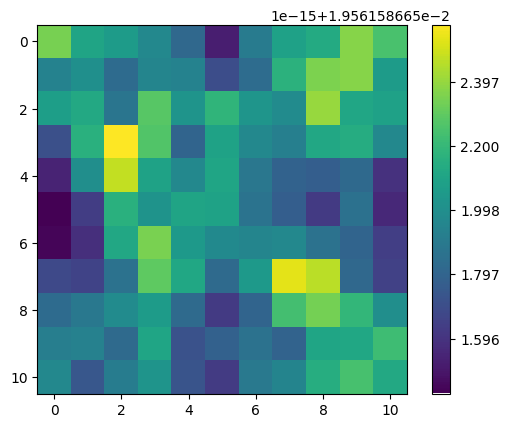

In [27]:
density = ham.density_function(H)
print(sum(density))

density = density.reshape(Ns)
density = np.real(density)
plt.figure()
plt.imshow(density[0,:,:])
plt.colorbar()
plt.show()